In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
path = r'/content/drive/MyDrive/ACM AI CKPLUS/images'
files = sorted(os.listdir(path))
from collections import Counter
import random

In [3]:
files=os.listdir(path)

In [4]:
Exp = files

In [5]:
import cv2
from google.colab.patches import cv2_imshow
i=0
last=[]
images=[]
labels=[]
for fle in files:
  idx=Exp.index(fle)
  label=idx
  
  total=path+'/'+fle
  files_exp= os.listdir(total)
  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    image= cv2.imread(file_main)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)

In [6]:
len(last)

7

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
images_f=np.array(images)
labels_f=np.array(labels)
images_f_2=images_f/255
labels_encoded=tf.keras.utils.to_categorical(labels_f, num_classes= 7)
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_encoded,test_size=0.25)

In [8]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(128,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  output= Dense(7,activation="sigmoid")(drop_1)

  model = Model(inputs=[inputs], outputs=[output])

  model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
  return model

In [9]:
Model=model(input_shape = (48,48,3))

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
fle_s= r'/content/drive/MyDrive/ACM AI CKPLUS/Emotion_detection3.h5'
checkpoint_path = os.path.dirname(fle_s)
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [12]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=20,callbacks=[callback_list])

Epoch 1/20
24/24 [==============================] - 4s 29ms/step - loss: 2.1034 - accuracy: 0.2261 - val_loss: 2.0079 - val_accuracy: 0.2742

Epoch 00001: loss improved from inf to 2.10340, saving model to /content/drive/MyDrive/ACM AI CKPLUS/Emotion_detection3.h5
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 1.9936 - accuracy: 0.2476 - val_loss: 1.8918 - val_accuracy: 0.2782

Epoch 00002: loss improved from 2.10340 to 1.99357, saving model to /content/drive/MyDrive/ACM AI CKPLUS/Emotion_detection3.h5
Epoch 3/20
24/24 [==============================] - 0s 10ms/step - loss: 1.9074 - accuracy: 0.2934 - val_loss: 1.8880 - val_accuracy: 0.3266

Epoch 00003: loss improved from 1.99357 to 1.90737, saving model to /content/drive/MyDrive/ACM AI CKPLUS/Emotion_detection3.h5
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 1.7095 - accuracy: 0.4024 - val_loss: 1.3536 - val_accuracy: 0.5565

Epoch 00004: loss improved from 1.90737 to 1.70951, savin

In [45]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual:  " + Exp[labels[ind]]  )
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  pred_class=Exp[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)

In [43]:
len(X_train)

743

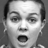

Label actual:  surprise
Predicted Label: surprise


In [47]:
test_image(72,images_f,images_f_2,Model)

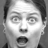

Label actual:  surprise
Predicted Label: surprise


In [48]:
test_image(36,images_f,images_f_2,Model)

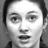

Label actual:  surprise
Predicted Label: surprise


In [49]:
test_image(40,images_f,images_f_2,Model)

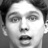

Label actual:  surprise
Predicted Label: surprise


In [17]:
test_image(160,images_f,images_f_2,Model)

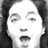

Label actual:  surprise
Predicted Label: surprise


In [18]:
test_image(2,images_f,images_f_2,Model)

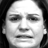

Label actual:  fear
Predicted Label: fear


In [28]:
test_image(490,images_f,images_f_2,Model)

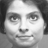

Label actual:  contempt
Predicted Label: contempt


In [20]:
test_image(265,images_f,images_f_2,Model)

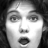

Label actual:  surprise
Predicted Label: surprise


In [21]:
test_image(110,images_f,images_f_2,Model)

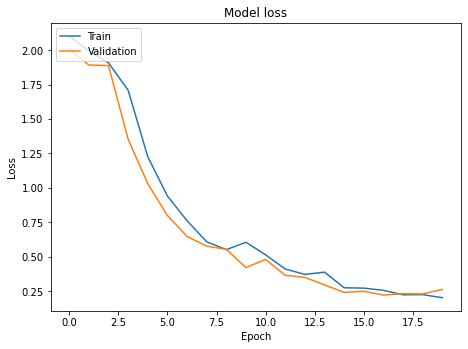

In [22]:
import matplotlib.pyplot as plt
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                    wspace=0.35)

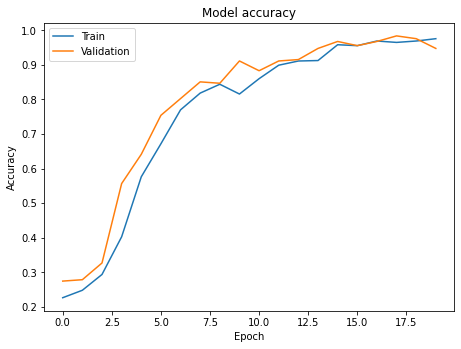

In [23]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                    wspace=0.35)

In [24]:
Pred=Model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

i=0 
Y_test_l=[] 
Pred_l=[] 
while(i<len(Pred)):   
  Y_test_l.append(int(np.argmax(Y_test[i])))     
  Pred_l.append(int(np.argmax(Pred[i])))   
  i+=1
report=classification_report(Y_test_l, Pred_l)

In [26]:
report=classification_report(Y_test_l, Pred_l)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        68
           1       1.00      1.00      1.00        10
           2       1.00      0.98      0.99        48
           3       0.79      1.00      0.88        15
           4       0.83      1.00      0.91        35
           5       0.85      0.65      0.73        17
           6       1.00      0.96      0.98        55

    accuracy                           0.95       248
   macro avg       0.92      0.93      0.92       248
weighted avg       0.95      0.95      0.95       248



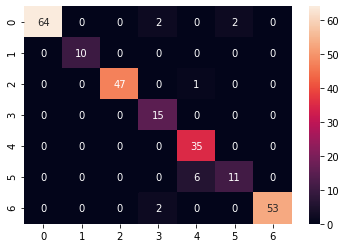

In [27]:
import seaborn as sns
results = confusion_matrix(Y_test_l, Pred_l)
sns.heatmap(results, annot=True)